# <center>Kullback–Leibler (KL) Divergence Python Example</center>

- <b>KL (Kullback – Leibler) Divergence</b> is also called <b>relative entropy</b>, <b>relative entropy information gain</b> or <b>information
  divergence</b>
- KLD <b>measures two probability distribution difference</b> 
- KLD <b>compares two probability distributions p(x) and q(x)</b>  
- KLD <b>measures information loss when q(x) is used to approximate p(x)</b> 
- KLD <b>answers questions</b>: 
    1. <b>If I used the “not-quite” right distribution q(x) to approximate p(x)?</b>  
    2. <b>How many bits of information do I need to represent p(x) more accurately?</b> 
- <b>KLD = 0 for two identical distributions</b> 
- def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))
    
- Reference:[KL Divergence Python Example](https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810)

In [21]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

In [2]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [ ]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

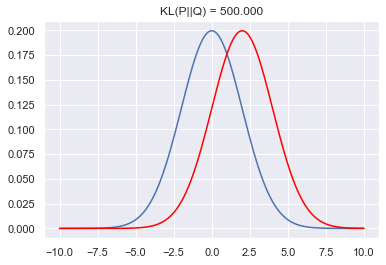

In [3]:
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

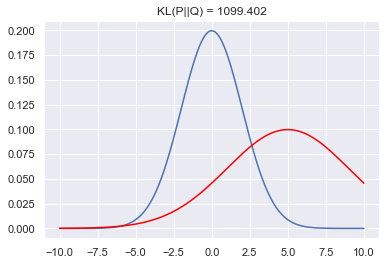

In [7]:
q = norm.pdf(x, 5, 4)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

In [22]:
x = np.arange(-10, 10, 0.001)
p_pdf = norm.pdf(x, 0, 2).reshape(1, -1)
np.random.seed(0)
random_mean = np.random.randint(10, size=1)
random_sigma = np.random.randint(10, size=1)
random_pdf = norm.pdf(x, random_mean, random_sigma).reshape(1, -1)

In [23]:
learning_rate = 0.001
epochs = 100

In [24]:
print(tf.__version__)

2.1.0


In [27]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [29]:
p = tf.placeholder(tf.float64, shape=p_pdf.shape)
mu = tf.Variable(np.zeros(1))
sigma = tf.Variable(np.eye(1))
normal = tf.exp(-tf.square(x - mu) / (2 * sigma))
q = normal / tf.reduce_sum(normal)

In [31]:
kl_divergence = tf.reduce_sum(
    tf.where(p == 0, tf.zeros(p_pdf.shape, tf.float64), p * tf.log(p / q))
)

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(kl_divergence)

In [33]:
init = tf.global_variables_initializer()

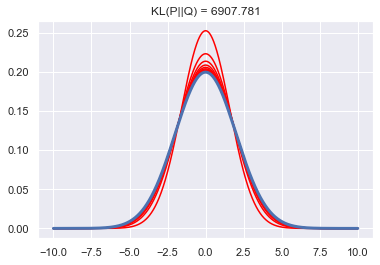

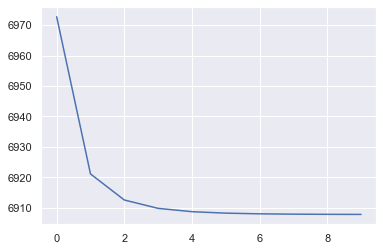

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    history = []
    means = []
    variances = []
    
    for i in range(epochs):
        sess.run(optimizer, { p: p_pdf })
        
        if i % 10 == 0:
            history.append(sess.run(kl_divergence, { p: p_pdf }))
            means.append(sess.run(mu)[0])
            variances.append(sess.run(sigma)[0][0])
    
    for mean, variance in zip(means, variances):
        q_pdf = norm.pdf(x, mean, np.sqrt(variance))
        plt.plot(x, q_pdf.reshape(-1, 1), c='red')
        plt.title('KL(P||Q) = %1.3f' % history[-1])
    plt.plot(x, p_pdf.reshape(-1, 1), linewidth=3)
    plt.show()
    
    plt.plot(history)
    plt.show()
    
    sess.close()